In [55]:
import pandas as pd
import numpy as np

# Read the CSV file
data = pd.read_csv('c4_game_database.csv')
data.head()

# Select columns pos01 to pos42
columns = [f'pos_{i:02d}' for i in range(1, 43)]
X_ = data[columns]
y = data['winner']

# Function to convert each row to a 6x7 2D array
def row_to_2d_array(row):
    return np.array(row).reshape(6, 7)

# Apply the function to each row
X = X_.apply(row_to_2d_array, axis=1)

Table:
 [[ 0.  0.  1.  1.  1.  1.  0.]
 [ 0.  0.  1. -1. -1. -1.  0.]
 [ 0.  0.  1.  1.  1. -1.  0.]
 [ 0.  0. -1. -1.  1.  1. -1.]
 [ 1. -1. -1.  1. -1. -1.  1.]
 [ 1. -1. -1. -1.  1.  1. -1.]]
Winner: 1.0


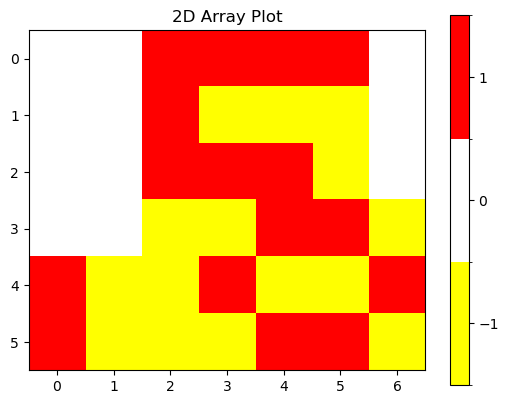

In [56]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

game_num = 1

# Assuming data_2d_arrays is already defined and contains the 2D arrays
# Display the 2D array for the a row
print('Table:\n', X[game_num])
print('Winner:', y[game_num])

array_to_plot = X.iloc[game_num]

# Define a custom colormap
cmap = mcolors.ListedColormap(['yellow', 'white', 'red'])
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the 2D array
plt.imshow(array_to_plot, cmap=cmap, norm=norm)
plt.colorbar(ticks=[-1, 0, 1])
plt.title('2D Array Plot')
plt.show()

# Logistic Regression Classifier

  Very naive model that only actually learns if a board is won or not and by who.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Flatten the 6x7 2D arrays back to 1D arrays for logistic regression
X_flat = X.apply(lambda x: x.flatten())
X_flat = np.stack(X_flat.values)

# Drop rows with NaN values in y
non_nan_indices = ~np.isnan(y)
X_flat = X_flat[non_nan_indices]
y = y[non_nan_indices]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8513222877170623


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Multilayer Perceptron (MLP) Classifiers

Pretty naive approach, but it should still work in theory. Other models like Random Forest, SVM, etc, should be tried to see if they perform better.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np

import pandas as pd
import numpy as np

# Load your dataset (assuming it's a CSV file)
data = pd.read_csv('c4_game_database.csv')

# Sample dataset structure
# For demonstration, let’s create a sample DataFrame based on your column names
columns = [f'pos_{i:02}' for i in range(1, 43)] + ['winner']
# Assume df is your DataFrame with 42 positions and a winner column

# Separate the board positions and the winner column
X = data[columns[:-1]].values  # The 42 board positions
y_winner = data['winner'].values  # The winner outcome

# Convert `winner` to a 7-element probability vector
y = np.zeros((len(y_winner), 7))
y[y_winner == 1] = 1    # If Player 1 won, set all columns to 1
y[y_winner == -1] = 0   # If Player 2 won, set all columns to 0
y[y_winner == 0] = 0.5  # If tie, set all columns to 0.5

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [3]:
# Define the MLP model
class Connect4MLP(nn.Module):
    def __init__(self):
        super(Connect4MLP, self).__init__()
        self.fc1 = nn.Linear(42, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 128)  # Second hidden layer
        self.fc3 = nn.Linear(128, 256)  # Third hidden layer
        self.fc4 = nn.Linear(256, 512)  # Fourth hidden layer
        self.fc5 = nn.Linear(512, 256)  # Fifth hidden layer
        self.fc6 = nn.Linear(256, 128)  # Sixth hidden layer
        self.fc7 = nn.Linear(128, 64)  # Seventh hidden layer
        self.fc8 = nn.Linear(64, 32)  # Eighth hidden layer
        self.fc9 = nn.Linear(32, 7)   # Output layer (7 probabilities for each column)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        x = torch.sigmoid(self.fc9(x))  # Sigmoid to output probabilities
        return x

# Initialize the model, loss function, and optimizer
model = Connect4MLP()
criterion = nn.MSELoss()  # Mean Squared Error loss for regression on probabilities
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    
    # Calculate loss
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


# Evaluation on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test).item()
    print(f'Loss on test set: {test_loss:.4f}')


Epoch [10/50], Loss: 0.2397
Epoch [20/50], Loss: 0.2202
Epoch [30/50], Loss: 0.1959
Epoch [40/50], Loss: 0.1800
Epoch [50/50], Loss: 0.1575
Loss on test set: 0.1552


In [3]:
# Load the dataset
data = pd.read_csv('c4_game_database.csv', on_bad_lines='skip')

# Prepare the features (X) and the target labels (y)
X = data.drop(columns=['winner']).values  # 42 positions
y_winner = data['winner'].values  # Winner outcome

# Convert the 'winner' column into a 7-element probability vector
y = np.zeros((len(y_winner), 7))

y[y_winner == 1] = 1    # If Player 1 won, set all columns to 1
y[y_winner == -1] = 0   # If Player 2 won, set all columns to 0
y[y_winner == 0] = 0.5  # If tie, set all columns to 0.5

# Check the shapes of X and y
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (376640, 42)
y shape: (376640, 7)


In [9]:
# Assuming `X` contains the 42 board positions and `y` contains the 7 probability targets for each move
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)  # Float for probability output
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the MLP model
class Connect4MLP(nn.Module):
    def __init__(self):
        super(Connect4MLP, self).__init__()
        self.fc1 = nn.Linear(42, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 32)  # Second hidden layer
        self.fc3 = nn.Linear(32, 7)   # Output layer (7 probabilities for each column)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid to output probabilities
        return x

# Initialize the model, loss function, and optimizer
model = Connect4MLP()
criterion = nn.MSELoss()  # Mean Squared Error loss for regression on probabilities
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test).item()
    print(f'Loss on test set: {test_loss:.4f}')


Epoch [10/50], Loss: 0.2392
Epoch [20/50], Loss: 0.2359
Epoch [30/50], Loss: 0.2291
Epoch [40/50], Loss: 0.2181
Epoch [50/50], Loss: 0.2058
Loss on test set: 0.2051


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Assuming `X` contains the 42 board positions reshaped as (num_samples, 6, 7)
# and `y` contains the 7 probability targets for each move
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to torch tensors, reshaping X for CNN input
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1, 6, 7)  # Add channel dimension
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1, 6, 7)    # Add channel dimension
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the CNN model
class Connect4CNN(nn.Module):
    def __init__(self):
        super(Connect4CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # Output size: 16x6x7
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1) # Output size: 32x6x7
        self.fc1 = nn.Linear(32 * 6 * 7, 64)   # Flatten and dense layer
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 7)  # Output layer (7 probabilities for each column)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid to output probabilities
        return x

# Initialize the model, loss function, and optimizer
model = Connect4CNN()
criterion = nn.MSELoss()  # Mean Squared Error loss for regression on probabilities
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test).item()
    print(f'Loss on test set: {test_loss:.4f}')


Epoch [10/50], Loss: 0.2371
Epoch [20/50], Loss: 0.2162
Epoch [30/50], Loss: 0.1746
Epoch [40/50], Loss: 0.1564
Epoch [50/50], Loss: 0.1438
Loss on test set: 0.1429
